<b> Data Preperation </b>

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import datetime as dt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('bank_note.txt',delimiter=',',header=None)

In [3]:
df.shape

(1372, 5)

In [4]:
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [6]:
X.shape

(1372, 4)

In [7]:
Y.shape

(1372,)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [9]:
X_train.shape

(1029, 4)

In [10]:
y_train.shape

(1029,)

In [11]:
X_test.shape

(343, 4)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train[:, 0].std()

1.0

<b> Adaboost </b> 

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
#Create a new Ada boost classifier
ada_cv = AdaBoostClassifier()
param_grid = {"n_estimators": np.arange(50, 150)}
#use gridsearch to test all values for n_estimators
ada_gscv = GridSearchCV(ada_cv, param_grid, cv=5)
#fit model to data
start_ada_cv = time.time()
ada_gscv.fit(X_train, y_train)
stop_ada_cv = time.time()
print("Time Take for finding the optimal n_estimators: ", stop_ada_cv - start_ada_cv)

Time Take for finding the optimal n_estimators:  111.98297572135925


In [15]:
print("Best Paramater: ", ada_gscv.best_params_)
print("Best Score: ", ada_gscv.best_score_)
print("Best estimator", ada_gscv.best_estimator_)

Best Paramater:  {'n_estimators': 107}
Best Score:  0.9980535164574947
Best estimator AdaBoostClassifier(n_estimators=107)


In [16]:
from sklearn.ensemble import AdaBoostClassifier
start_ada = time.time()
classifier_ada = AdaBoostClassifier(n_estimators=138, random_state=0)
classifier_ada.fit(X_train, y_train)
stop_ada = time.time()
print("Time Taken for training: ", stop_ada - start_ada)

Time Taken for training:  0.29620933532714844


In [17]:
start_ada_test= time.time()
y_pred_ada = classifier_ada.predict(X_test)
stop_ada_test = time.time()
print("Time Taken for test: ", stop_ada_test - start_ada_test)
cm_ada = confusion_matrix(y_test, y_pred_ada)
tn, fp, fn, tp = cm_ada.ravel()
print("Confusion Matrix: \n", cm_ada)
print("Accuracy: ", accuracy_score(y_test, y_pred_ada))
print("True Negative: ", tn, "\nFalse Positive: ", fp, "\nFalse Negative: ", fn, "\nTrue Positive: ", tp)

Time Taken for test:  0.03687620162963867
Confusion Matrix: 
 [[184   0]
 [  1 158]]
Accuracy:  0.9970845481049563
True Negative:  184 
False Positive:  0 
False Negative:  1 
True Positive:  158


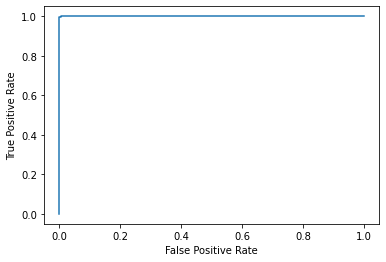

In [18]:
y_pred_proba_ada = classifier_ada.predict_proba(X_test)[::,1]
fpr_ada, tpr_ada, _ = metrics.roc_curve(y_test,  y_pred_proba_ada)

#create ROC curve
plt.plot(fpr_ada,tpr_ada)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<b> Naïve Bayes </b>

In [19]:
from sklearn.naive_bayes import GaussianNB
start_naive= time.time()
classifier_naive = GaussianNB()
classifier_naive.fit(X_train, y_train)
stop_naive = time.time()
print("Time Taken for training: ", stop_naive - start_naive)

Time Taken for training:  0.002027750015258789


In [20]:
start_naive_test= time.time()
y_pred_naive = classifier_naive.predict(X_test)
stop_naive_test = time.time()
print("Time Taken for testing: ", stop_naive_test - start_naive_test)
cm_naive = confusion_matrix(y_test, y_pred_naive)
tn, fp, fn, tp = cm_naive.ravel()
print("Confusion Matrix: \n", cm_naive)
print("Accuracy: ", accuracy_score(y_test, y_pred_naive))
print("True Negative: ", tn, "\nFalse Positive: ", fp, "\nFalse Negative: ", fn, "\nTrue Positive: ", tp)

Time Taken for testing:  0.0009989738464355469
Confusion Matrix: 
 [[170  14]
 [ 39 120]]
Accuracy:  0.8454810495626822
True Negative:  170 
False Positive:  14 
False Negative:  39 
True Positive:  120


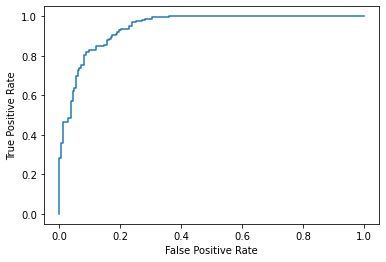

In [21]:
y_pred_proba_naive = classifier_naive.predict_proba(X_test)[::,1]
fpr_naive, tpr_naive, _ = metrics.roc_curve(y_test,  y_pred_proba_naive)

#create ROC curve
plt.plot(fpr_naive,tpr_naive)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<b> K Nearest Neighbors </b>

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create a new knn model
knn_cv = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_cv, param_grid, cv=5)
#fit model to data
start_knn_cv = time.time()
knn_gscv.fit(X_train, y_train)
stop_knn_cv = time.time()
print("Time Take for finding the optimal n_estimators: ", stop_knn_cv - start_knn_cv)

Time Take for finding the optimal n_estimators:  0.6714661121368408


In [23]:
print("Best Paramater: ", knn_gscv.best_params_)
print("Best Score: ", knn_gscv.best_score_)
print("Best estimator", knn_gscv.best_estimator_)

Best Paramater:  {'n_neighbors': 2}
Best Score:  0.9990291262135923
Best estimator KNeighborsClassifier(n_neighbors=2)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
start_knn = time.time()
classifier_knn = KNeighborsClassifier(n_neighbors=2)
classifier_knn.fit(X_train, y_train)
stop_knn = time.time()
print("Time Taken for training: ", stop_knn - start_knn)

Time Taken for training:  0.0019898414611816406


In [25]:
start_knn_test= time.time()
y_pred_knn = classifier_knn.predict(X_test)
stop_knn_test = time.time()
print("Time Taken for testing: ", stop_knn_test - start_knn_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("Confusion Matrix: \n", cm_knn)
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("True Negative: ", tn, "\nFalse Positive: ", fp, "\nFalse Negative: ", fn, "\nTrue Positive: ", tp)

Time Taken for testing:  0.012962102890014648
Confusion Matrix: 
 [[183   1]
 [  0 159]]
Accuracy:  0.9970845481049563
True Negative:  183 
False Positive:  1 
False Negative:  0 
True Positive:  159


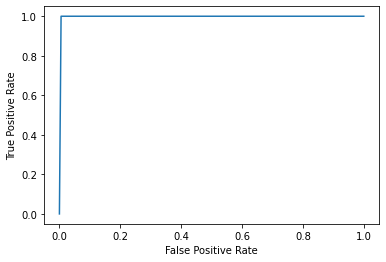

In [26]:
y_pred_proba_knn = classifier_knn.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)

#create ROC curve
plt.plot(fpr_knn,tpr_knn)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()